# Classes Tutorial

## This is a tutorial to explain the basics of classes
- How to assign attributes
- Using init
- Assigning functions to a class

### Classes require no imported modules it is part of the core of python
### First we will create a simple class called example1

In [1]:
class example1():
    x=3

### You can see that it is very similar to using a definition
### Inside the we have defined x to be equal to 3

In [2]:
example1.x

3

### you can see that as a result example1 has an attribute called x that when called returns the value 3
### An attribute is anything that comes after a dot (.)
### For example in a numpy array:

In [ ]:
import numpy as np
arr= np.array([1,2,3])
arr.mean()

### Here "mean" is an attribute of arr which shows an attribute can also be a function
### Below is another example with lists (something else that is a core part of python)

In [ ]:
ls= ['d', 'D', 'a', 'e']
ls.sort()
ls

### In this example the function and attribute "sort" changes the list itself. When you have finished this tutorial see if you can make a class that can do this

### So lets experiment further with classes and add some functions

In [ ]:
class example2():
    def XplusY(x, y):
        return x+y

In [ ]:
example2.XplusY(1,2)

### So far this just looks like a nice way to organise your code by grouping definitions or values within a class, which can be helpful for you to find definitions and values easier and for others hoping to use your code. However, there is a lot more that can be done

### Next we will look at what can be done with init and self

In [3]:
class example3():
    def __init__(self, x, y):
        self.x = x
        self.y= y
        self.XplusY= x+y

### The definition __init__ tells python that when you use this class this definition will be used straight away, it is part of the initial set up

In [4]:
ex= example3(4, 5)

In [5]:
ex.x

4

In [6]:
ex.y

5

In [7]:
ex.XplusY

9

### Try using the class the way that is shown above. In the same way as when you use a definition, python will show that you need 2 arguments x and y. You will notice that self is an argument of the __init__ definition but you do not put anything in its place when using the class. Self refers to the object ex that is created when you use the class

### By using self.x, self.y and self.XplusY, you are adding attributes to self and therefore to ex

### The use of self is not limited to just the __init__ definition

In [8]:
class example4():
    def __init__(self, x, y):
        self.x = x
        self.y= y
    def addXY(self):
        return self.x + self.y
    def addXYZ(self, z):
        return self.x + self.y + z
    def timesXY(self):
        return self.x * self.y
    def timesXYZ(self, z):
        return self.x* self.y *z


In [9]:
ex4= example4(3, 4)
ex4.addXY()

7

In [10]:
ex4.addXYZ(10)

17

In [11]:
ex4.timesXY()

12

In [12]:
ex4.timesXYZ(10)

120

### Experiment and play around with this and try out your own ideas
# There is lots more to discover with classes this is only the beginning!!!!!

### Example Class
Here we over an example class. In this class we are going to design something makes it easier to create polar plots that use magnetic local time and magnetic latitude. We are going to take in matplotlib subplot (ax) that is already using the projection 'polar' and we are going alter some of the functionality so we do not have to keep converting from magnetic local time and magnetic latitude to theta and R.

You will notice we have included object in the class creation. This changes nothing for this class or its operation. This is what python will do automatically but people are familiar with older versions of python it can help with clarification. I will explain what this does after this example.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
class Polar(object):
    def __init__(self, ax):
        self.ax= ax #make the orginal subplot an attribute for easy access
        self.set_mlt_zero_location= ax.set_theta_zero_location # Change the name to mlt
        ax.format_coord= self.make_format() #Alter the hover co-ordinates to mlt and mlat. This shows up in interactive mode
        ax.set_xticklabels([0, 3, 6, 9, 12, 15, 18, 21]) #change the theta labels to MLT
        ax.set_theta_zero_location('S') # make 0/24 at the south of the plot
        ticks=list(range(0, 100, 10))
        ax.set_rticks(ticks[:int(len(ax.get_yticklabels())/2)+2])
        labels= np.array((range(90, -10, -10)))
        ax.set_yticklabels(labels[:len(ax.get_yticklabels())]) #Adding MLat labels
        ax.autoscale(enable=False) # This prevents the limits of the plot from automatically changing this is useful as we always want 90 MLat to be the innermost
    def TothetaR(self, mlt, mlat):
        # function to convert mlt and mlat to theta and r, the co-ordinate system of the original subplot
        mlt=np.array(mlt)
        mlat=np.array(mlat)
        theta=mlt*np.pi/12
        x= -np.sin(theta-np.pi/2)
        y= np.sin(theta)
        θ = np.arctan2(y, x)
        return θ, 90-mlat
    def ToMag(self, theta, r):
        # function to convert from theta and r to mlt and mlat (useful for the display hover co-ordinates)
        mlat= 90-np.array([r])
        mlt= np.array([theta]) *(12/np.pi)
        mlt[mlt<-0]+=24
        return mlt, mlat
    def vec_theta(self, mlt):
        # For vectors
        theta=mlt*np.pi/12
        x= np.sin(theta)
        y= np.sin(theta-np.pi/2)
        θ = np.arctan2(y, x)
        return θ
    def vec_conv(self, dr, dt, theta):
        # For vectors
        return dr * np.cos(theta) - dt*np.sin(theta), dr*np.sin(theta) + dt*np.cos(theta)
    def plot(self, mlt, mlat, **kwargs):
        # Change plot to automatically convert to theta and r and then plot
        return self.ax.plot(*self.TothetaR(mlt, mlat), **kwargs)
    def scatter(self, mlt, mlat, **kwargs):
        # same as plot for scatter
        return self.ax.scatter(*self.TothetaR(mlt, mlat), **kwargs)
    def quiver(self, mlt, mlat, East, North, **kwargs):
        # same as plot but for quivers
        v_theta= self.vec_theta(mlt)
        theta, r= self.TothetaR(mlt, mlat)
        return self.ax.quiver(theta, r, *self.vec_conv(-North, East, v_theta), **kwargs)
    def make_format(current):
        # current and other are axes
        def format_coord(theta, r):
            # x, y are data coordinates
            # convert to display coords
            display_coord = current.ToMag(theta,r)
            # convert back to data coords with respect to ax
            ax_coord= (float(i) for i in display_coord)
            string= 'mlt={:.2f}, mlat={:.2f}'.format(*ax_coord) 
            return (string)
        return format_coord


/tmp/ipykernel_709532/2759391530.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([0, 3, 6, 9, 12, 15, 18, 21])


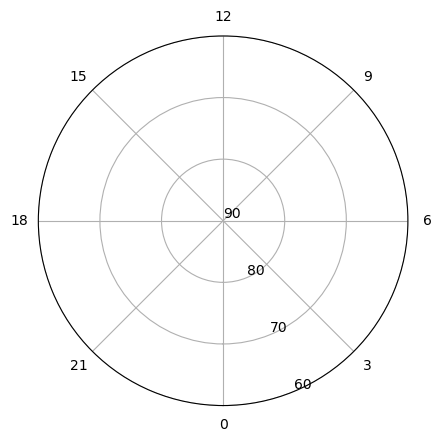

In [3]:
fig= plt.figure()
ax= Polar(fig.add_subplot(111, projection='polar'))


In [46]:
ax.scatter([1, 2], [70, 75], color='red', marker='x')
ax.quiver(np.array([1, 2]), np.array([70, 75]), np.array([1, 0]), np.array([1, -1]))

/tmp/ipykernel_678618/4162948231.py:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax_coord= (float(i) for i in display_coord)


### What does placing something in the brackets do?
Here we will try places the subplot object in the brackets instead of object. This can be found easily by using type(ax) where ax in a matplotlib subplot. When you specify a type of object in the brackets the new class will inherit all the attributes and methods of said object. In this case it inherits all the attributes and methods of Axes. We are still free to add your own functions or overwrite those defualts. If you use this class you will notice that you can still use it as before.

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
class Polar(matplotlib.axes._axes.Axes):
    def __init__(self, ax):
        self.ax= ax #make the orginal subplot an attribute for easy access
        self.set_mlt_zero_location= ax.set_theta_zero_location # Change the name to mlt
        ax.format_coord= self.make_format() #Alter the hover co-ordinates to mlt and mlat. This shows up in interactive mode
        ax.set_xticklabels([0, 3, 6, 9, 12, 15, 18, 21]) #change the theta labels to MLT
        ax.set_theta_zero_location('S') # make 0/24 at the south of the plot
        ticks=list(range(0, 100, 10))
        ax.set_rticks(ticks[:int(len(ax.get_yticklabels())/2)+2])
        labels= np.array((range(90, -10, -10)))
        ax.set_yticklabels(labels[:len(ax.get_yticklabels())]) #Adding MLat labels
        ax.autoscale(enable=False) # This prevents the limits of the plot from automatically changing this is useful as we always want 90 MLat to be the innermost
    def TothetaR(self, mlt, mlat):
        # function to convert mlt and mlat to theta and r, the co-ordinate system of the original subplot
        mlt=np.array(mlt)
        mlat=np.array(mlat)
        theta=mlt*np.pi/12
        x= -np.sin(theta-np.pi/2)
        y= np.sin(theta)
        θ = np.arctan2(y, x)
        return θ, 90-mlat
    def ToMag(self, theta, r):
        # function to convert from theta and r to mlt and mlat (useful for the display hover co-ordinates)
        mlat= 90-np.array([r])
        mlt= np.array([theta]) *(12/np.pi)
        mlt[mlt<-0]+=24
        return mlt, mlat
    def vec_theta(self, mlt):
        # For vectors
        theta=mlt*np.pi/12
        x= np.sin(theta)
        y= np.sin(theta-np.pi/2)
        θ = np.arctan2(y, x)
        return θ
    def vec_conv(self, dr, dt, theta):
        # For vectors
        return dr * np.cos(theta) - dt*np.sin(theta), dr*np.sin(theta) + dt*np.cos(theta)
    def plot(self, mlt, mlat, **kwargs):
        # Change plot to automatically convert to theta and r and then plot
        return self.ax.plot(*self.TothetaR(mlt, mlat), **kwargs)
    def scatter(self, mlt, mlat, **kwargs):
        # same as plot for scatter
        return self.ax.scatter(*self.TothetaR(mlt, mlat), **kwargs)
    def quiver(self, mlt, mlat, East, North, **kwargs):
        # same as plot but for quivers
        v_theta= self.vec_theta(mlt)
        theta, r= self.TothetaR(mlt, mlat)
        return self.ax.quiver(theta, r, *self.vec_conv(-North, East, v_theta), **kwargs)
    def make_format(current):
        # current and other are axes
        def format_coord(theta, r):
            # x, y are data coordinates
            # convert to display coords
            display_coord = current.ToMag(theta,r)
            # convert back to data coords with respect to ax
            ax_coord= (float(i) for i in display_coord)
            string= 'mlt={:.2f}, mlat={:.2f}'.format(*ax_coord) 
            return (string)
        return format_coord

/tmp/ipykernel_709532/3926964289.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([0, 3, 6, 9, 12, 15, 18, 21]) #change the theta labels to MLT


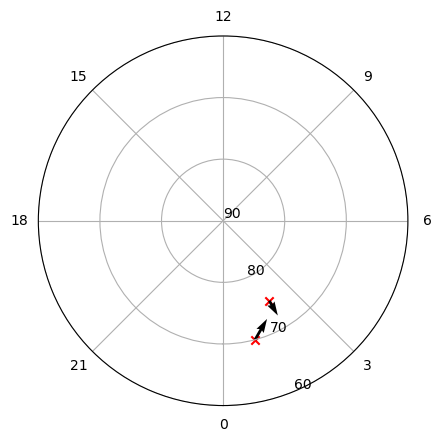

In [20]:
fig= plt.figure()
ax= Polar(fig.add_subplot(111, projection='polar'))
ax.scatter([1, 2], [70, 75], color='red', marker='x')
ax.quiver(np.array([1, 2]), np.array([70, 75]), np.array([1, 0]), np.array([1, -1]))

As you can see we can still do what we had done before. but lets try using an attribute that we didn't define and that we know exists in a subplot: zorder

In [21]:
ax.zorder

0

as you can see zorder is now an attribute of our class despite not being defined. This is a result of creating our class by essentially using the subplot preset or template.

## Lets try this will something else

In [32]:
class example(object):
    def __init__(self, x, **kwargs):
        self.x= x
        self.kwargs= kwargs

    def __len__(self):
        return len(self.x)
    
class like_example(example):
    pass

As you can see we made the class example. We then used it as a template for the class like_example

In [33]:
y= like_example(np.array([1, 2, 3]), thing=10)

In [34]:
len(y)

3

It functions exactly the same as example because we didn't change anything when we made like_example.
If we change something:

In [41]:
class like_example2(example):
    def __init__(self, x, **kwargs):
        self.x= x
        print(kwargs)
        self.kwargs= kwargs

In [42]:
z= like_example2(np.array([1, 2, 3]), thing=3, fruit='apple')

{'thing': 3, 'fruit': 'apple'}


In [43]:
len(z)

3

it has altered what we told it to be retained components of the template
## Where could we use this often?
Lets make our own errors!

In [45]:
class ArgumentError(Exception):
     pass
class ModelError(Exception):
    pass

Here I have made two new errors. They retain all the properties of the exception class (which is the name of the error class)

In [46]:
raise ArgumentError('Argument bad')

ArgumentError: Argument bad

it behaves and be treated like any other exception except we now have our own type which make it easier to group problems and make code easier to understand